In [1]:
import tensorflow as tf
from tensorflow import keras

In [2]:
mnist = keras.datasets.mnist.load_data()

In [3]:
(X_train_full, y_train_full), (X_test, y_test) = mnist 

In [4]:
X_train_full.shape

(60000, 28, 28)

In [5]:
X_test.shape

(10000, 28, 28)

In [6]:
y_train_full.shape

(60000,)

In [7]:
y_test.shape

(10000,)

In [8]:
X_train_full.dtype

dtype('uint8')

In [9]:
X_valid, X_train = X_train_full[:5000]/255.0, X_train_full[5000:]/255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [10]:
X_test = X_test/255.0

trying a sequential model first

In [11]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [13]:
checkpoint_cb = keras.callbacks.ModelCheckpoint('my_keras_model.h5', save_best_only=True)

In [14]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)

In [15]:
import os
root_logdir = os.path.join(os.curdir, "my_logs")

def get_run_logdir():
    import time
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)

In [16]:
run_logdir = get_run_logdir()

In [17]:
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)

In [22]:
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='sgd',
    metrics=['accuracy'])

In [23]:
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid), 
                    callbacks=[checkpoint_cb, early_stopping_cb, tensorboard_cb])

Epoch 1/30
1719/1719 [==============================] - 5s 3ms/step - loss: 1.0561 - accuracy: 0.7113 - val_loss: 0.3070 - val_accuracy: 0.9144
Epoch 2/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3108 - accuracy: 0.9104 - val_loss: 0.2390 - val_accuracy: 0.9352
Epoch 3/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.2431 - accuracy: 0.9311 - val_loss: 0.2037 - val_accuracy: 0.9414
Epoch 4/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.2040 - accuracy: 0.9414 - val_loss: 0.1765 - val_accuracy: 0.9498
Epoch 5/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.1756 - accuracy: 0.9490 - val_loss: 0.1569 - val_accuracy: 0.9564
Epoch 6/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.1565 - accuracy: 0.9551 - val_loss: 0.1440 - val_accuracy: 0.9590
Epoch 7/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.1414 - accuracy: 0.9599 - val_loss: 0.1322 - val_accuracy:

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

(0.0, 1.0)

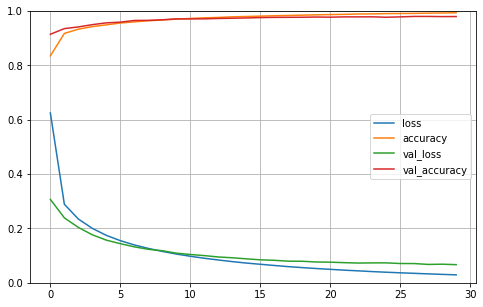

In [25]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)

In [28]:
model = keras.models.load_model("my_keras_model.h5")

In [29]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0728 - accuracy: 0.9793


[0.07283985614776611, 0.9793000221252441]

let's train the model for some more epochs

In [30]:
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid), 
                    callbacks=[checkpoint_cb, early_stopping_cb, tensorboard_cb])

Epoch 1/30
1719/1719 [==============================] - 4s 3ms/step - loss: 0.0274 - accuracy: 0.9941 - val_loss: 0.0675 - val_accuracy: 0.9798
Epoch 2/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.0262 - accuracy: 0.9941 - val_loss: 0.0658 - val_accuracy: 0.9794
Epoch 3/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.0249 - accuracy: 0.9947 - val_loss: 0.0668 - val_accuracy: 0.9800
Epoch 4/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.0236 - accuracy: 0.9950 - val_loss: 0.0673 - val_accuracy: 0.9800
Epoch 5/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.0222 - accuracy: 0.9957 - val_loss: 0.0669 - val_accuracy: 0.9794
Epoch 6/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.0212 - accuracy: 0.9959 - val_loss: 0.0656 - val_accuracy: 0.9802
Epoch 7/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.0201 - accuracy: 0.9963 - val_loss: 0.0658 - val_accuracy:

In [31]:
model = keras.models.load_model("my_keras_model.h5")

In [32]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0703 - accuracy: 0.9803


[0.0702899768948555, 0.9803000092506409]

noice improvement. though I just cheated. you shouldn't evaluate on the test set more than once.